In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search

lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

In [5]:
def get_temperature_and_pressure(date,from_hour,to_hour):
    f=[]
    
    for i in np.arange(from_hour,to_hour,1):
#         if(i<12):
#             am_or_pm="AM"
#         if(i>=12):    
#             am_or_pm="PM"
#         if(i==0):
#             i = i+12
#         if(i>12):
#             i = (i-12)
        if(i<10):
            hour = "0%d" %i
        if(i>9):
            hour ="%d" %i
        print("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour))    
        ## f is not a significant name---> -5 points
        f.append(h5py.File("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour), mode='r+'))
    airtemperature_list = []
    surfacetemperature_list = []
    pressure_list = []
    for i in np.arange(0,len(f),1):
        airtemperature_list.extend(list(f[i]["AirTemperature/AirTemperatures"]))
        surfacetemperature_list.extend(list(f[i]["SurfaceTemperature/SurfaceTemperatures"]))
        pressure_list.extend(list(f[i]["Pressure/Pressures"]))
    [f_.close() for f_ in f] ## good programing
    return airtemperature_list, surfacetemperature_list, pressure_list

In [18]:
air,surface,pressure = get_temperature_and_pressure(20191121, 16, 20)

/data/SC_data/TemperatureAndPressure20191121/TempAndPressure20191121_16.hdf5
/data/SC_data/TemperatureAndPressure20191121/TempAndPressure20191121_17.hdf5
/data/SC_data/TemperatureAndPressure20191121/TempAndPressure20191121_18.hdf5
/data/SC_data/TemperatureAndPressure20191121/TempAndPressure20191121_19.hdf5


### Load data

In [5]:
fname = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X2/'
tmp = load_dir(fname, file_prefix='Dis')

No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrode

In [6]:
fname = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X9/'
tmp2 = load_dir(fname, file_prefix='DMdata')

No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrode

In [13]:
fname = r'/home/data_transfer/data_from_windows/20191204/Bead1/Response/'
tmp3 = load_dir(fname)

120  files in folder
120  files loaded


In [211]:
foldername = r'/data/new_trap/20191114/Bead1/DMdata_X_4/'
resp_x = discharge_response(foldername=foldername,str_axis='x',drive_freq=151)

200  files in folder
200  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [15]:
foldername = r'/data/new_trap/20191114/Bead1/DMdata_X_8/'
bdfs = load_dir(foldername)

216  files in folder
216  files loaded


In [30]:
foldername = r'/home/data_transfer/data_from_windows/20191121/Bead1/Discharge/'
bdfs = load_dir(foldername)

356  files in folder
356  files loaded


In [10]:
resp_x2_tmp3 = [np.std(bb.response_at_freq2('x',drive_freq=153,bandwidth=1)) for bb in tmp3]
resp_x3_tmp3 = [np.std(bb.response_at_freq3('x',drive_freq=153,bandwidth=1)) for bb in tmp3]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


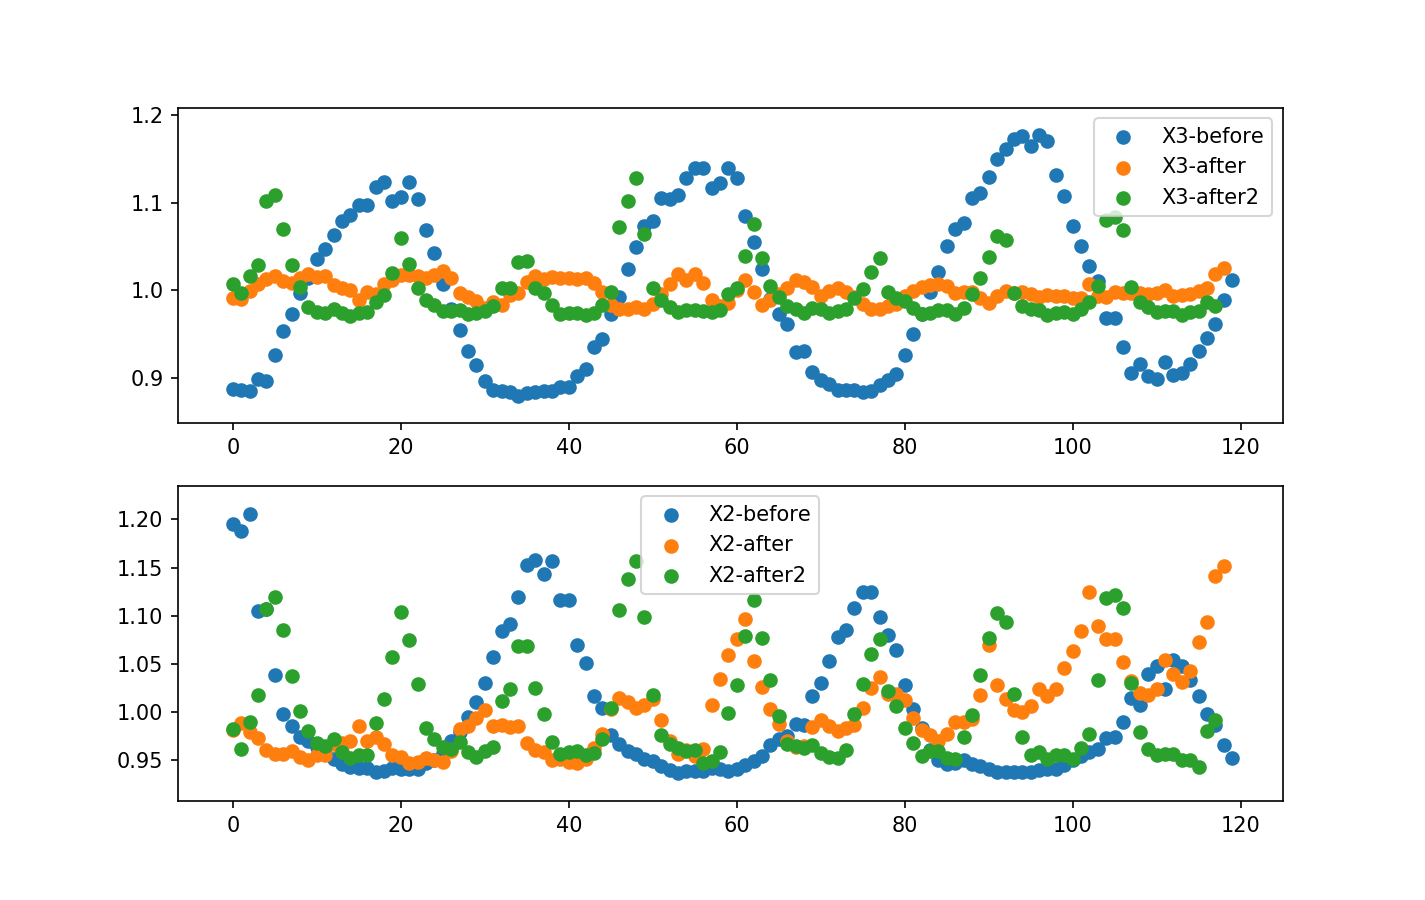

In [12]:
_,ax = plt.subplots(2,1,figsize=(9.5,6))
bb = np.arange(len(resp_x2_tmp))
ax[0].scatter(range(120), resp_x3_tmp/np.mean(resp_x3_tmp), label='X3-before')
ax[0].scatter(range(119), resp_x3_tmp2/np.mean(resp_x3_tmp2), label='X3-after')
ax[0].scatter(range(118), resp_x3_tmp3/np.mean(resp_x3_tmp3), label='X3-after2')

ax[1].scatter(range(120), resp_x2_tmp/np.mean(resp_x2_tmp), label='X2-before')
ax[1].scatter(range(119), resp_x2_tmp2/np.mean(resp_x2_tmp2), label='X2-after')
ax[1].scatter(range(118), resp_x2_tmp3/np.mean(resp_x2_tmp3), label='X2-after2')

[a.legend() for a in ax]

In [35]:
x_value = np.array([np.mean(bb.x2) for bb in bdfs])

In [15]:
air = air[45*60:]

<IPython.core.display.Javascript object>


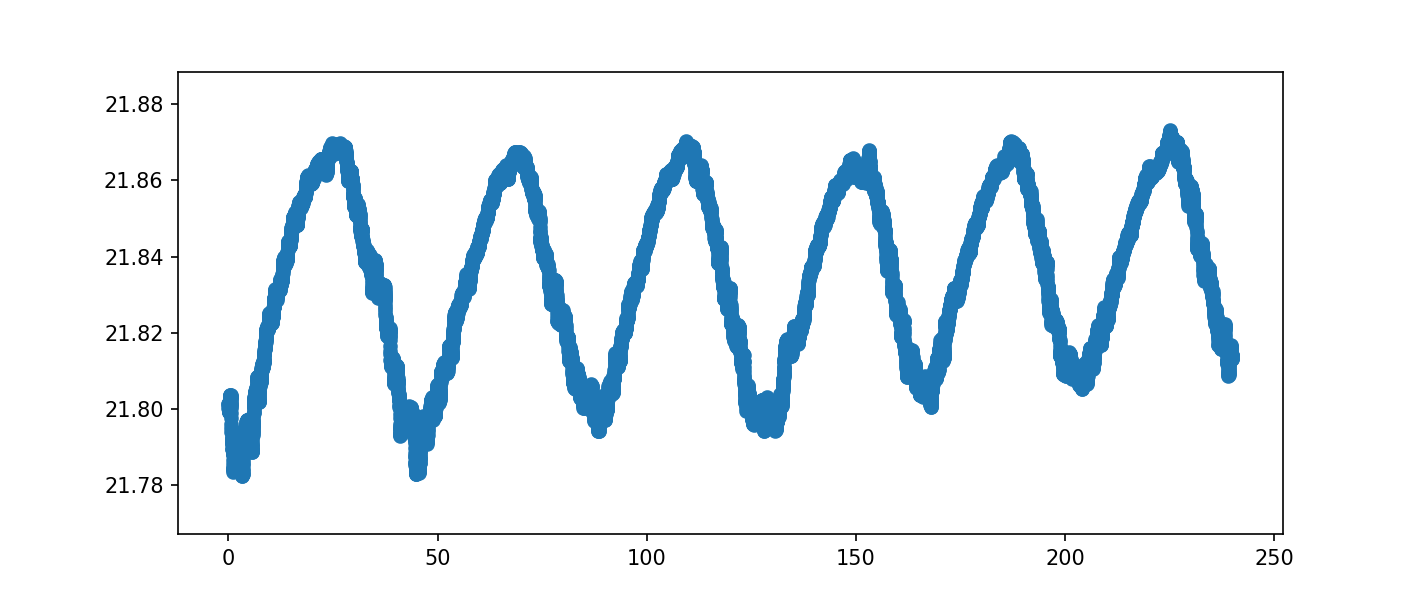

In [22]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax[0].scatter(10*np.arange(len(resp_x2)),resp_x2/resp_x2[1])
# ax[0].scatter(10*np.arange(len(resp_x3)),resp_x3/resp_x3[1])
# ax[0].scatter(10*np.arange(len(resp_x3)),x_value/x_value[1])
# ax.scatter(np.arange(len(air))/60,air)
ax.scatter(np.arange(len(air))/60,surface)
# ax[1].scatter(range(len(air)),pressure/pressure[0])

<IPython.core.display.Javascript object>


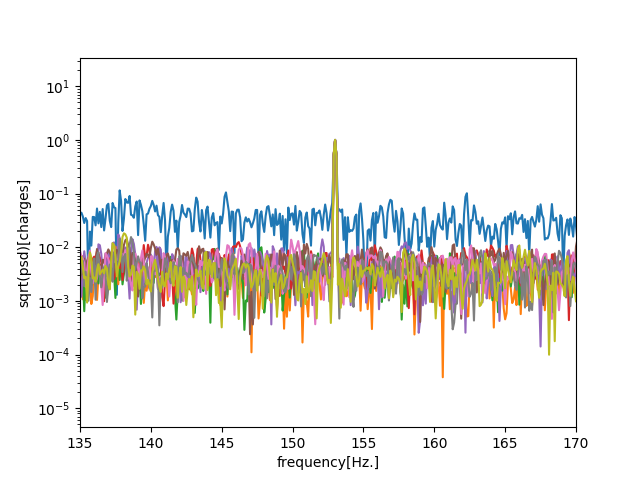

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (135, 170),
 Text(0.5, 0, 'frequency[Hz.]')]

In [28]:
_,ax = plt.subplots()
for bb in bdfs[::30]:
    fft3, freq3 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax.semilogy(freq3, np.sqrt(fft3))
ax.set(xlim=(135,170), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [19]:
bb = bdfs[1]
freq = bb.welch_psd('x')[0]
resp_x_psd = [bb.welch_psd('x')[1][(freq>152.5)*(freq<153.5)] for bb in bdfs]
resp_x_psd = np.sqrt(resp_x_psd)

In [44]:
freq[126]

153.80859375

In [20]:
x_value = [np.mean(bb.x2) for bb in bdfs]
quad_sum = [np.mean(bb.quad_sum) for bb in bdfs]
z_value = [np.mean(bb.z2) for bb in bdfs]
y_value = [np.mean(bb.y2) for bb in bdfs]

<IPython.core.display.Javascript object>


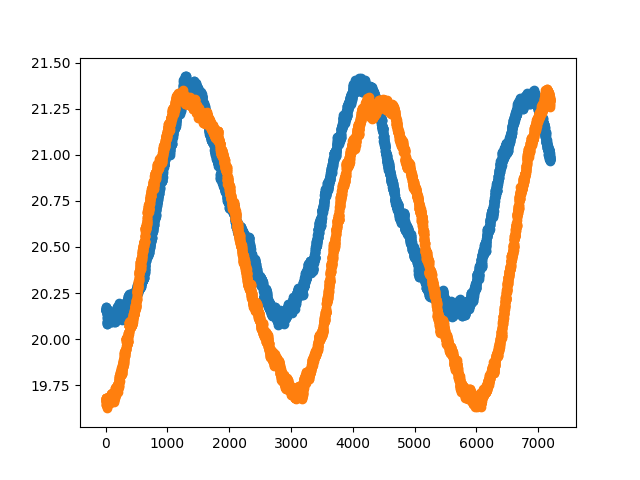

In [32]:
_,ax = plt.subplots()
ax.scatter(range(len(air2)),air2)
ax.scatter(range(len(air2)),air3)

<IPython.core.display.Javascript object>


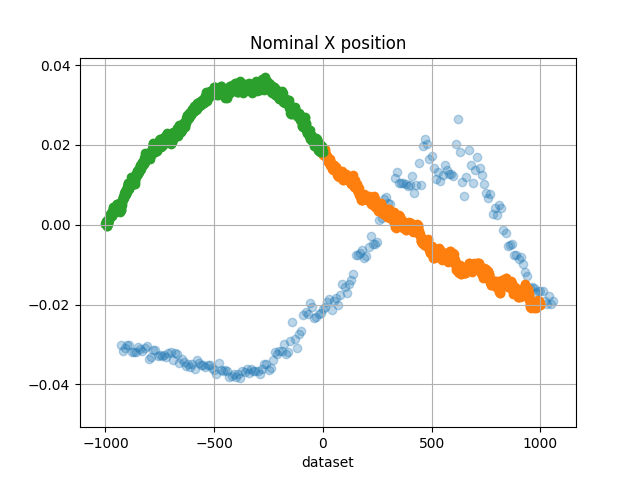

In [25]:
_,ax = plt.subplots()
x_ticks = np.arange(len(resp_x_psd))
datasets = (np.arange(200)-93)*10
# ax.scatter(x_ticks,resp_x_psd/resp_x_psd[3], alpha= 0.6, label='X-position ASD value')
# ax.scatter(x_ticks,resp_x/resp_x[3], alpha= 0.3, label='std after bandpass')
ax.set(xlabel='dataset', title ='Nominal X position')
ax.scatter(datasets,x_value[16:], alpha= 0.3, label='x-mean scaled')
ax.scatter(range(1000),air[:1000]/air[400]-1)
ax.scatter(np.arange(1000)-1000,air2[-1000:]/air[400]-1)
# ax.scatter(x_ticks,z_value/z_value[3]*0.3+1.3, alpha= 0.3, label='z-mean*0.3+0.7')
# ax.scatter(x_ticks,y_value/y_value[3]*0.3+1.3, alpha= 0.3, label='y-mean*0.3+0.7')

ax.grid()
# ax.legend()

<IPython.core.display.Javascript object>


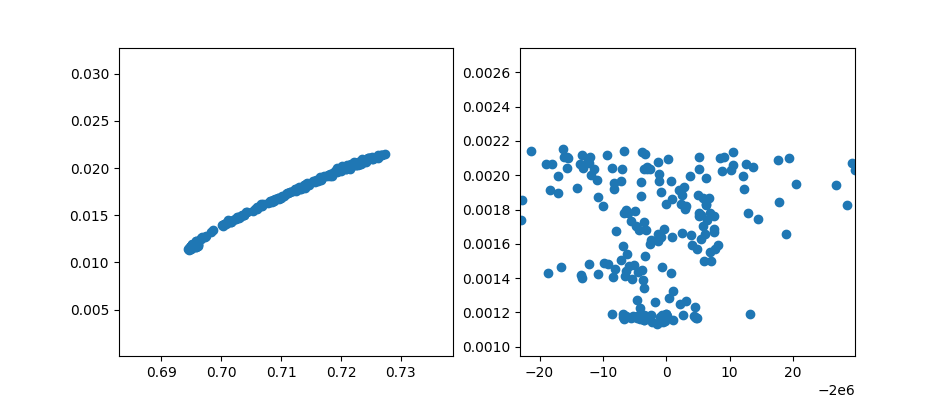

In [71]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(np.array(x_value)*0.3+0.7, resp_x_psd*10)
ax[1].scatter(z_value, resp_x_psd)

In [104]:
resp_x2 = [np.std(bb.response_at_freq2('x',drive_freq=151)) for bb in bdfs]
resp_x3 = [np.std(bb.response_at_freq3('x',drive_freq=151)) for bb in bdfs]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


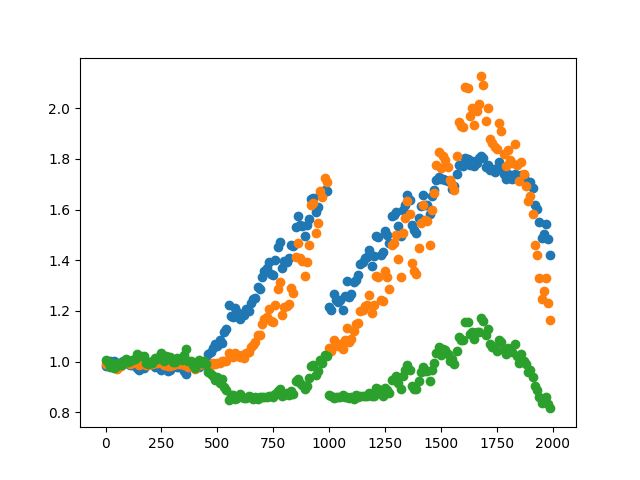

In [111]:
_,ax = plt.subplots()
ax.scatter(x_ticks, resp_x2/resp_x2[10])
ax.scatter(x_ticks, resp_x3/resp_x3[10])
ax.scatter(x_ticks, np.array(resp_x3)*resp_x2[10]/np.array(resp_x2)/resp_x3[10])

In [5]:
folde1 = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X2/'
bdfs_before = load_dir(folde1)

120  files in folder
120  files loaded


In [8]:
folde1 = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X9/'
bdfs_after = load_dir(folde1, file_prefix='DMdata')

119  files in folder
119  files loaded


In [9]:
resp_x2 = [np.std(bb.response_at_freq2('x',drive_freq=153,bandwidth=1)) for bb in bdfs_before]
resp_x3 = [np.std(bb.response_at_freq3('x',drive_freq=153,bandwidth=1)) for bb in bdfs_before]

resp_x2_2 = [np.std(bb.response_at_freq2('x',drive_freq=153,bandwidth=1)) for bb in bdfs_after]
resp_x3_2 = [np.std(bb.response_at_freq3('x',drive_freq=153,bandwidth=1)) for bb in bdfs_after]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


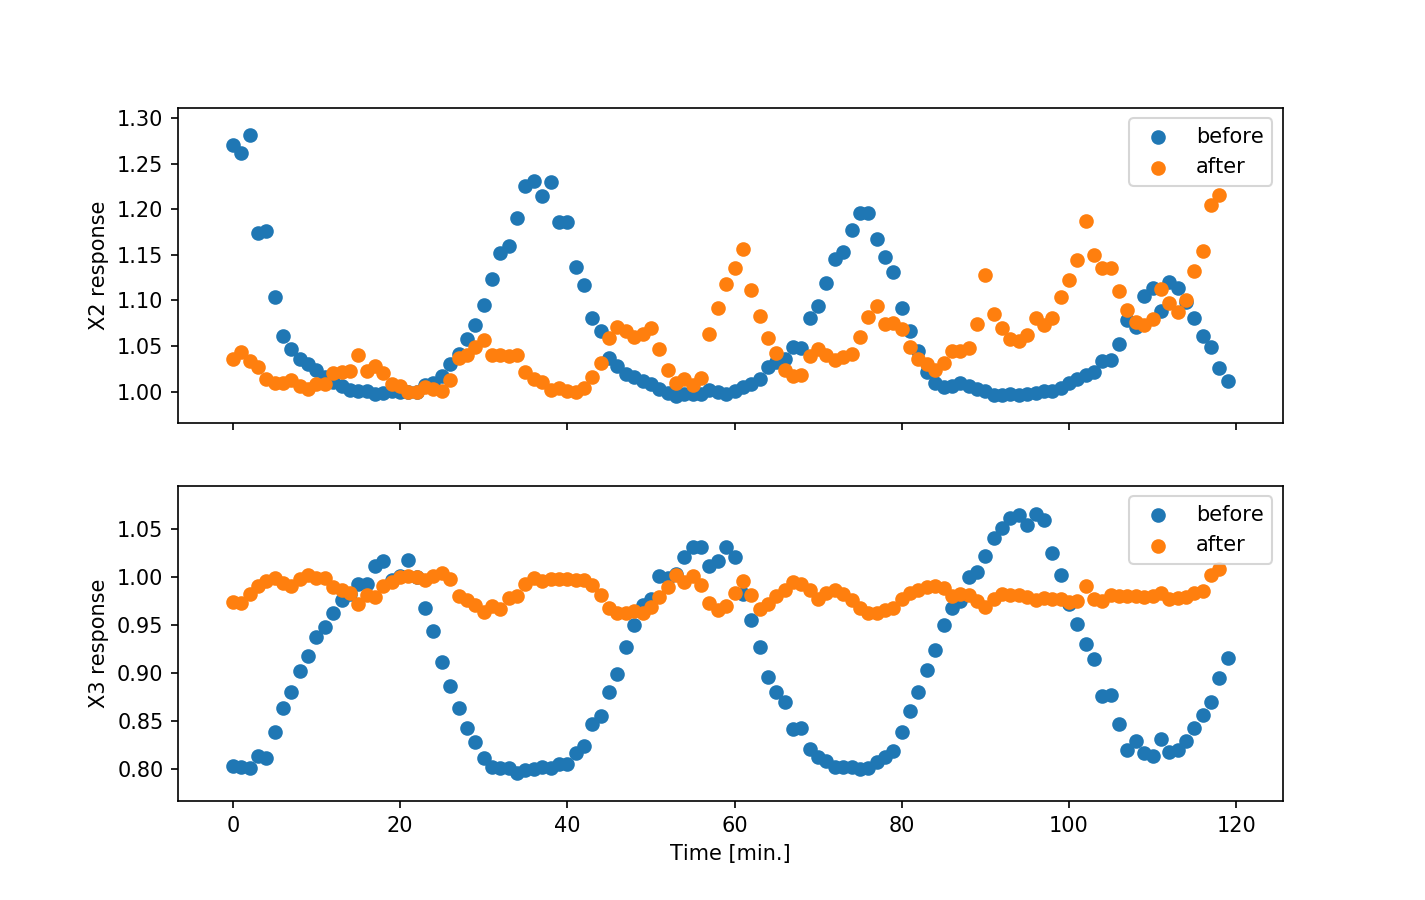

In [18]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
ax[0].scatter(range(len(resp_x2)),resp_x2/resp_x2[22], label='before')
ax[0].scatter(range(len(resp_x2_2)),resp_x2_2/resp_x2_2[22], label='after')
ax[0].set(ylabel='X2 response')

ax[1].scatter(range(len(resp_x2)),resp_x3/resp_x3[22], label='before')
ax[1].scatter(range(len(resp_x2_2)),resp_x3_2/resp_x3_2[22], label='after')
ax[1].set(ylabel='X3 response', xlabel='Time [min.]')

ax[0].legend()
ax[1].legend()